In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [36]:
df = pd.read_csv('Churn_Modelling.csv')

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [39]:
df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [40]:
df.Age.min()

np.float64(18.0)

In [41]:
df.Age.max()

np.float64(92.0)

In [42]:
labels = ['0-20', '21-40', '41-60', '61-80', 'Above 80']
bins = [0,20,40,60,80,100]
df['Age_Bins'] = pd.cut(df.Age, bins, labels=labels, include_lowest=True)

In [43]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bins
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,41-60


In [44]:
df[['Age', 'Age_Bins']]

,Age,Age_Bins
0,42.0,41-60
1,41.0,41-60
2,42.0,41-60
3,39.0,21-40
4,43.0,41-60
...,...,...
9995,39.0,21-40
9996,35.0,21-40
9997,36.0,21-40
9998,42.0,41-60


In [45]:
df.Age_Bins.value_counts()

Age_Bins
21-40       6143
41-60       3031
61-80        429
0-20          85
Above 80      12
Name: count, dtype: int64

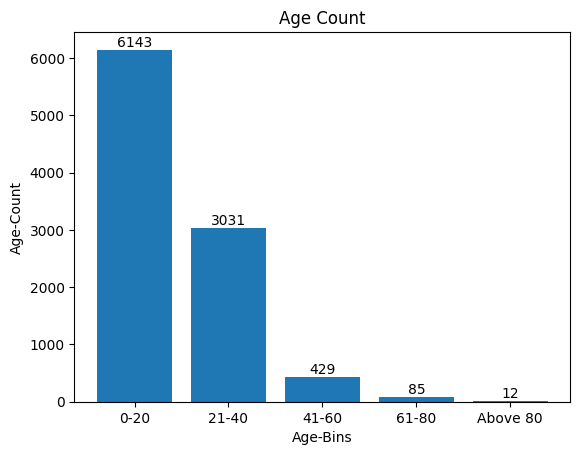

In [50]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], str(y.iloc[i]), ha='center', va='bottom')

# Plotting
plt.bar(labels, df.Age_Bins.value_counts())
add_labels(labels, df.Age_Bins.value_counts())

plt.title("Age Count")
plt.xlabel("Age-Bins")
plt.ylabel("Age-Count")
plt.show()